# Predicting vigilance using machine learning
## Random Forest Model 1
Rosalie Lucas (6540384)

This is the first model from my thesis predicting drops in vigilance using machine learning.
In this model different temperature features will be used to train a random forest. These features are variable between trials.
The features are all iButton temperature sensors, FLIR data and distal-proximal gradients calculated from this data.

In [1]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# Installed Graphviz using Pip3

In [2]:
PATH = '/Users/roos/Developer/Bachelor-Thesis'

In [38]:
data_file_path = '/Users/roos/Data/all_trials_noNaN2.csv'
data_file = pd.read_csv(data_file_path)
data = data_file[['9A00000045146841',
       'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
       'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results', 'FLIR_forehead', 'FLIR_nose', 'FLIR_DPG_nose-forehead']]

for column in data:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data.isnull().sum())

The number of values for feature 9A00000045146841 : 27
The number of values for feature F9000000452CCF41 : 65
The number of values for feature 76000000452C9741 : 38
The number of values for feature 7200000045201D41 : 25
The number of values for feature 4B0000004516B141 : 187
The number of values for feature CB000000452D7441 : 73
The number of values for feature DPG_finger-chest : 366
The number of values for feature DPG_nose-forehead : 235
The number of values for feature DPG_pinna-mastoid : 63
The number of values for feature results : 2 -- [0. 1.]
The number of values for feature FLIR_forehead : 1716
The number of values for feature FLIR_nose : 1716
The number of values for feature FLIR_DPG_nose-forehead : 1716
9A00000045146841          0
F9000000452CCF41          0
76000000452C9741          0
7200000045201D41          0
4B0000004516B141          0
CB000000452D7441          0
DPG_finger-chest          0
DPG_nose-forehead         0
DPG_pinna-mastoid         0
results                  

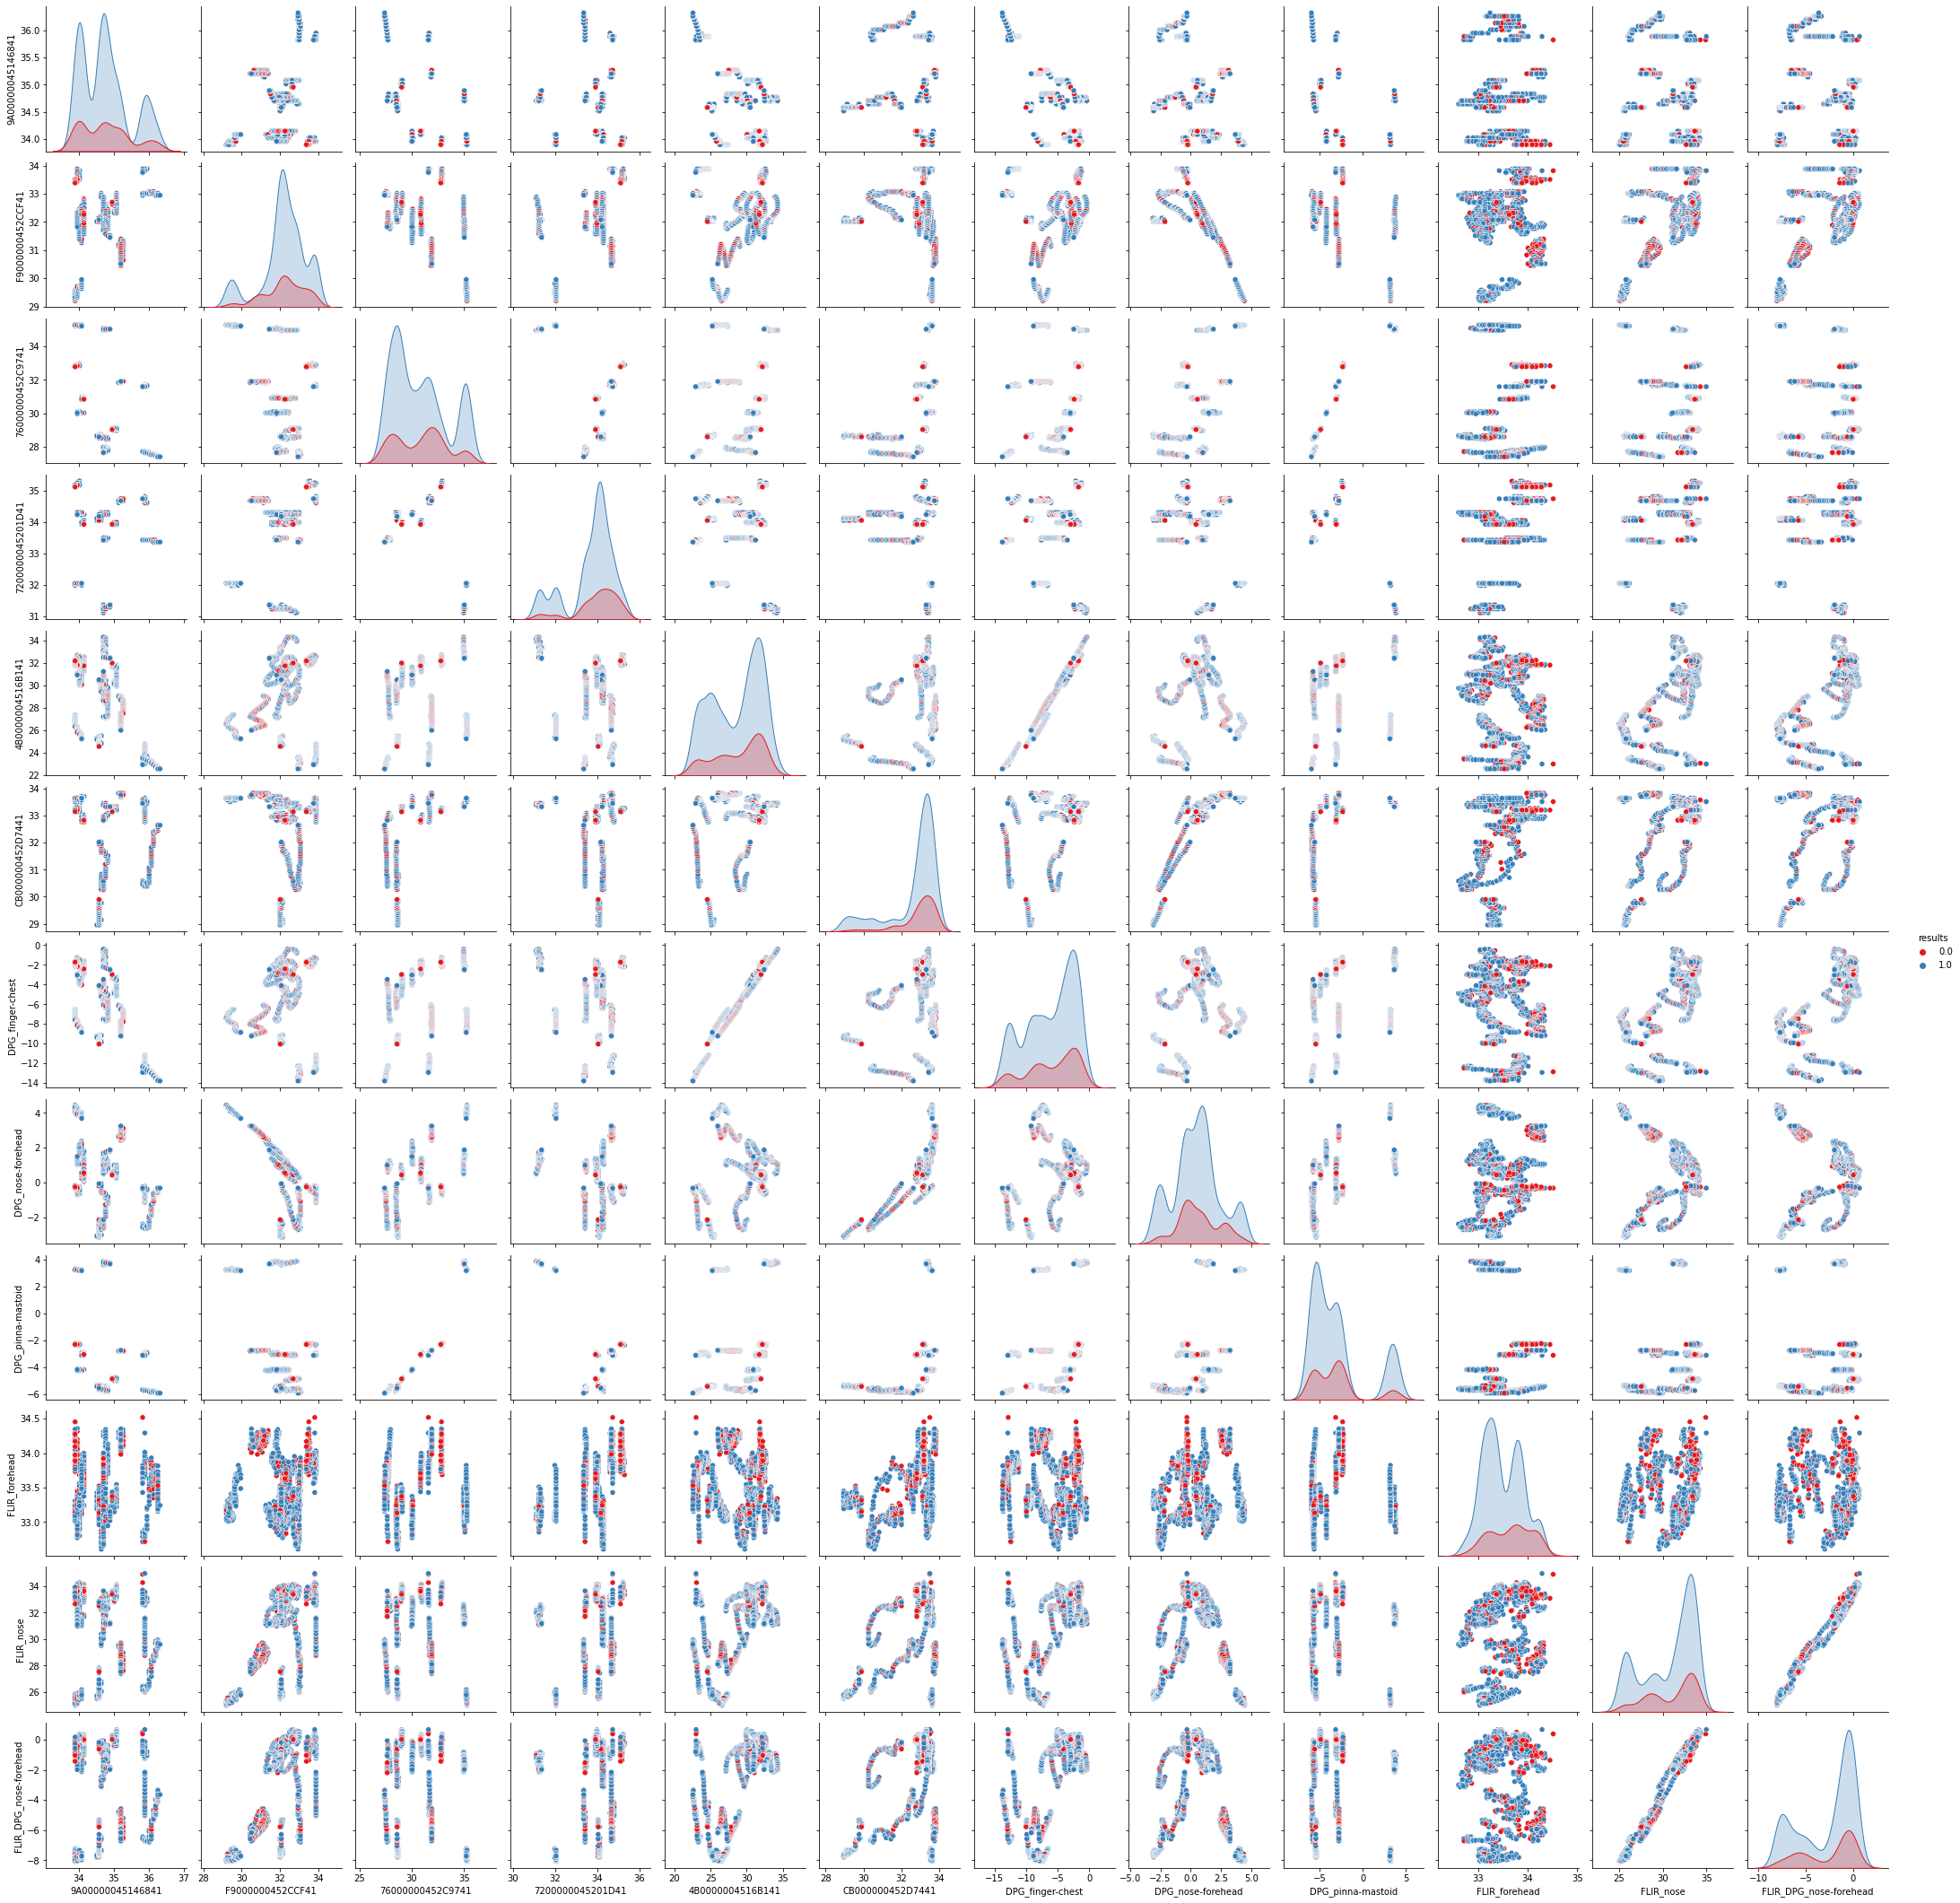

In [4]:
plot = sns.pairplot(data, hue='results', palette="Set1")

In [5]:
# Splitting the data
X = data.drop('results', axis=1).values
Y = data['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (1716, 12)
Y shape: (1716,)


In [35]:
dt = DecisionTreeClassifier(max_depth=3, random_state=30)
dt.fit(X_train, Y_train)

print("Train:", Y_train.sum()/(len(Y_train)))
print("Test:", Y_test.sum()/len(Y_test))


Train: 0.7798833819241983
Test: 0.7645348837209303


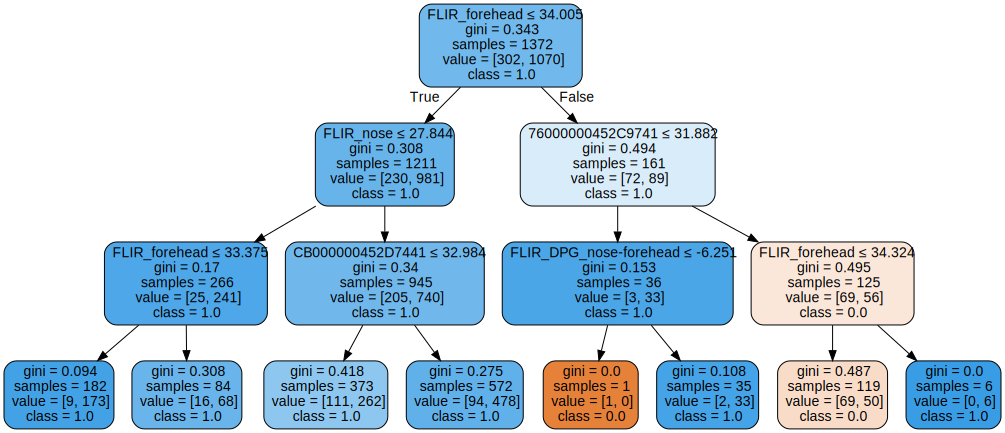

In [7]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('model1.gv', view=True)
graph


In [8]:
final = ''
fi = ''
for i, column in enumerate(data.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature 9A00000045146841:, 0.000
Importance of feature F9000000452CCF41:, 0.000
Importance of feature 76000000452C9741:, 0.231
Importance of feature 7200000045201D41:, 0.000
Importance of feature 4B0000004516B141:, 0.000
Importance of feature CB000000452D7441:, 0.151
Importance of feature DPG_finger-chest:, 0.000
Importance of feature DPG_nose-forehead:, 0.000
Importance of feature DPG_pinna-mastoid:, 0.000
Importance of feature FLIR_forehead:, 0.468
Importance of feature FLIR_nose:, 0.118
Importance of feature FLIR_DPG_nose-forehead:, 0.032


,index,Variable,Feature Importance Score
0,9,FLIR_forehead,0.468443
1,2,76000000452C9741,0.230626
2,5,CB000000452D7441,0.150595
3,10,FLIR_nose,0.117867
4,11,FLIR_DPG_nose-forehead,0.032468
5,0,9A00000045146841,0.000000
6,1,F9000000452CCF41,0.000000
7,3,7200000045201D41,0.000000
8,4,4B0000004516B141,0.000000
9,6,DPG_finger-chest,0.000000


In [9]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.7944606413994169
Testing Accuracy is:  0.7703488372093024


In [41]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=9)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

random_forest2 = RandomForestClassifier(n_estimators=100, random_state=9, max_depth=5)
random_forest2.fit(X_train, Y_train)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

# Accuracy on Test
print("Optimized Training Accuracy is: ", random_forest2.score(X_train, Y_train))
# Accuracy on Train
print("Optimized Testing Accuracy is: ", random_forest2.score(X_test, Y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.7383720930232558
Optimized Training Accuracy is:  0.8112244897959183
Optimized Testing Accuracy is:  0.7761627906976745


In [11]:
fi2 = ''
final2 = ''
for i, column in enumerate(data.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2

Importance of feature 9A00000045146841:, 0.028
Importance of feature F9000000452CCF41:, 0.055
Importance of feature 76000000452C9741:, 0.028
Importance of feature 7200000045201D41:, 0.023
Importance of feature 4B0000004516B141:, 0.080
Importance of feature CB000000452D7441:, 0.054
Importance of feature DPG_finger-chest:, 0.085
Importance of feature DPG_nose-forehead:, 0.072
Importance of feature DPG_pinna-mastoid:, 0.039
Importance of feature FLIR_forehead:, 0.197
Importance of feature FLIR_nose:, 0.168
Importance of feature FLIR_DPG_nose-forehead:, 0.171


,index,Variable,Feature Importance Score
0,9,FLIR_forehead,0.197156
1,11,FLIR_DPG_nose-forehead,0.171444
2,10,FLIR_nose,0.168079
3,6,DPG_finger-chest,0.084690
4,4,4B0000004516B141,0.079551
5,7,DPG_nose-forehead,0.072229
6,1,F9000000452CCF41,0.054732
7,5,CB000000452D7441,0.054016
8,8,DPG_pinna-mastoid,0.038670
9,2,76000000452C9741,0.028399


In [42]:
from sklearn import metrics
# Calculate values for the ROC
y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(Y_test, y_pred_proba)
print(list(fpr1))
print(list(tpr1))
print(auc1)
y_pred_proba2 = random_forest2.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(Y_test, y_pred_proba2)
print(list(fpr2))
print(list(tpr2))
print(auc2)

[0.0, 0.037037037037037035, 0.07407407407407407, 0.12345679012345678, 0.12345679012345678, 0.13580246913580246, 0.14814814814814814, 0.1728395061728395, 0.20987654320987653, 0.2222222222222222, 0.2345679012345679, 0.2345679012345679, 0.25925925925925924, 0.32098765432098764, 0.35802469135802467, 0.35802469135802467, 0.38271604938271603, 0.41975308641975306, 0.41975308641975306, 0.4444444444444444, 0.4567901234567901, 0.4567901234567901, 0.4691358024691358, 0.48148148148148145, 0.49382716049382713, 0.5061728395061729, 0.5185185185185185, 0.5308641975308642, 0.5555555555555556, 0.5555555555555556, 0.5802469135802469, 0.5802469135802469, 0.5925925925925926, 0.6049382716049383, 0.6049382716049383, 0.6049382716049383, 0.6172839506172839, 0.6296296296296297, 0.6296296296296297, 0.6419753086419753, 0.6666666666666666, 0.6666666666666666, 0.7037037037037037, 0.7283950617283951, 0.7407407407407407, 0.7407407407407407, 0.7407407407407407, 0.7777777777777778, 0.7901234567901234, 0.790123456790123